# Melting and hysteresis - Main exercise

compare with exercise2_and_5 of MD course by Giovanni

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Point 1
1. Perform simulations of a Lennard Jones crystal with 864 particles at different temperatures from 0.01 to 3.0. The temperature can be controlled using the Langevin thermostat. What happens to the crystal as temperature increases?

In [2]:
n_particles = 864

### generate the lattice of the crystal using lattice.py

compute the number $n$ to generate the lattice (such that the n. of particles is $4 n^3$)

In [3]:
n_lattice = (n_particles/4)**(1/3)

print(n_lattice)

5.999999999999999


which is 6, so pass it to the lattice.py file, which is used to generate the coordinates of particles on the lattice

In [7]:
%%bash
python3 lattice.py 6 > crystal864.xyz

### perform simulations using simplemd.py

make directory Results and put there the output files of simplemd.py

In [5]:
%%bash

mkdir -p Results

2. Compute the average potential energy for different values of the temperature (ranging from 0.1 to 3 in Lennard Jones units) using a fixed friction (e.g. γ = 1). Also compute the specific heat using energy flucutations and
look at how the specific heat depends on the temperature. Remember that you should discard the initial equilibration.

In [6]:
Ts = np.linspace(0.1,3,30)
print(Ts)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]


nstat: how often it saves energies data (e.g., 10)

nstep: how many steps? 4000 (or 20.000, but it becomes long)

In [8]:
%%bash

for T in 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.0
do
echo $T
cat > Results/in-$T << EOF
inputfile crystal864.xyz
outputfile output.xyz
temperature $T
tstep 0.005
friction 1.0
forcecutoff 2.5
listcutoff 3.0
nstep 4000
nconfig 10 Results/trajectoryT$T.xyz
nstat 10 Results/energiesT$T.dat
EOF
python3 simplemd.py < Results/in-$T
done

0.3
Neighbour list recomputed at step  0
List size:  864000
Neighbour list recomputed at step  28
List size:  864000
Neighbour list recomputed at step  61
List size:  864000
Neighbour list recomputed at step  94
List size:  864000
Neighbour list recomputed at step  118
List size:  864000
Neighbour list recomputed at step  146
List size:  864000
Neighbour list recomputed at step  171
List size:  864000
Neighbour list recomputed at step  194
List size:  864000
Neighbour list recomputed at step  225
List size:  864000
Neighbour list recomputed at step  252
List size:  864000
Neighbour list recomputed at step  276
List size:  864000
Neighbour list recomputed at step  296
List size:  864000
Neighbour list recomputed at step  323
List size:  864000
Neighbour list recomputed at step  351
List size:  864000
Neighbour list recomputed at step  371
List size:  864000
Neighbour list recomputed at step  395
List size:  864000
Neighbour list recomputed at step  421
List size:  864000
Neighbour list 

## Point 2
2. Compute the average total energy at different temperatures. How does the energy depend on the temperature? Also compute the heat capacity
\begin{equation}
C_v = \frac{\langle E^2 \rangle - \langle E \rangle ^2}{T^2}
\end{equation}
of the system for different temperatures.

Read the statistics: the columns are 

istep, $istep\cdot tstep$, $2.0 \cdot engkin/(3.0 \cdot natoms)$, engconf, engkin+engconf, engkin+engconf+engint

In [35]:
ene = {}
Ts = np.linspace(0.1, 3, 30)

for temp in Ts:
    ene[temp] = np.loadtxt("Results/energiesT%.1f.dat" % temp)

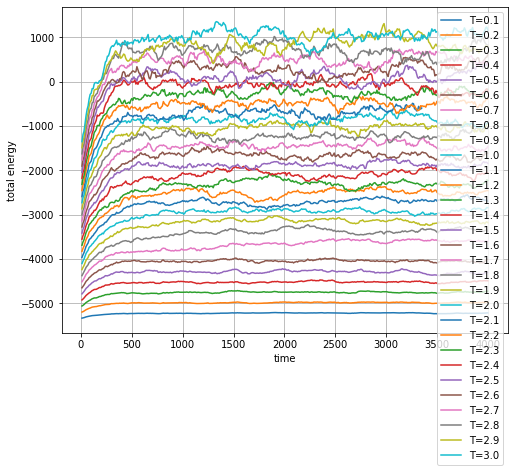

In [36]:
plt.figure(figsize=(8, 6))

for temp in Ts:
    plt.plot(ene[temp][:, 0], ene[temp][:, 4], label='T=%.1f' % temp)

plt.legend()
plt.grid(axis='both')
plt.xlabel('time')
plt.ylabel('total energy')
plt.show()

discard initial steps because of equilibration

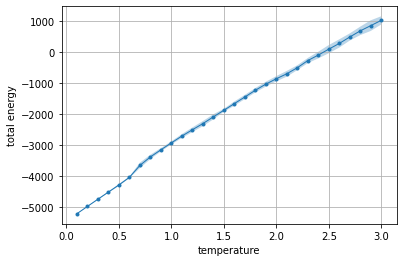

In [37]:
energy_mean = []
energy_var = []

for temp in Ts:
    energy_mean.append(np.mean(ene[temp][50:, 4]))
    energy_var.append(np.std(ene[temp][50:, 4])**2)

plt.plot(Ts, energy_mean, '.-', linewidth=1)
# plt.errorbar(Ts, energy_mean, np.sqrt(energy_var))
plt.fill_between(Ts, energy_mean - np.sqrt(energy_var), energy_mean + np.sqrt(energy_var), alpha=0.3)
plt.grid()
plt.xlabel('temperature')
plt.ylabel('total energy')
plt.show()

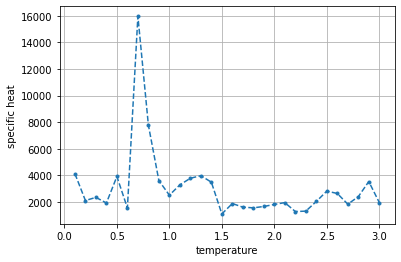

In [38]:
Cv = energy_var/Ts**2

plt.plot(Ts, Cv, '.--')
plt.xlabel('temperature')
plt.ylabel('specific heat')
plt.grid()
plt.show()

## Point 3
3. Repeat the exercise starting from a structure that has been equilibrated for a long time at $T=3$ (hint: simpleMD writes the final coordinates on a file; you should start from that configuration). Are the average energy and the heat capacity the same as in the previous points of the exercise? For which temperatures do you observe more difference?

In [ ]:
%%bash

for T in 3.0
do
echo $T
cat > Results/in-$T << EOF
inputfile crystal864.xyz
outputfile output.xyz
temperature $T
tstep 0.005
friction 1.0
forcecutoff 2.5
listcutoff 3.0
nstep 20000
nconfig 10 Results/trajectoryT$T.xyz
nstat 10 Results/energiesT$T.dat
EOF
python3 simplemd.py < Results/in-$T
done

3.0
Neighbour list recomputed at step  0
List size:  864000
Neighbour list recomputed at step  7
List size:  864000
Neighbour list recomputed at step  16
List size:  864000
Neighbour list recomputed at step  25
List size:  864000
Neighbour list recomputed at step  34
List size:  864000
Neighbour list recomputed at step  44
List size:  864000
Neighbour list recomputed at step  54
List size:  864000
Neighbour list recomputed at step  63
List size:  864000
Neighbour list recomputed at step  72
List size:  864000
Neighbour list recomputed at step  81
List size:  864000
Neighbour list recomputed at step  90
List size:  864000
Neighbour list recomputed at step  98
List size:  864000
Neighbour list recomputed at step  106
List size:  864000
Neighbour list recomputed at step  115
List size:  864000
Neighbour list recomputed at step  123
List size:  864000
Neighbour list recomputed at step  132
List size:  864000
Neighbour list recomputed at step  140
List size:  864000
Neighbour list recompute

In [32]:
!mkdir -p Results/point3

In [51]:
%%bash

for T in 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0
do
echo $T
cat > Results/point3/in-$T << EOF
inputfile output.xyz
outputfile output2.xyz
temperature $T
tstep 0.005
friction 1
forcecutoff 2.5
listcutoff 3.0
nstep 4000
nconfig 10 Results/point3/trajectoryT$T.xyz
nstat 10 Results/point3/energiesT$T.dat
EOF
python3 simplemd.py < Results/point3/in-$T
done

0.1
Neighbour list recomputed at step  0
List size:  864000
Neighbour list recomputed at step  13
List size:  864000
Neighbour list recomputed at step  26
List size:  864000
Neighbour list recomputed at step  38
List size:  864000
Neighbour list recomputed at step  50
List size:  864000
Neighbour list recomputed at step  65
List size:  864000
Neighbour list recomputed at step  80
List size:  864000
Neighbour list recomputed at step  95
List size:  864000
Neighbour list recomputed at step  110
List size:  864000
Neighbour list recomputed at step  124
List size:  864000
Neighbour list recomputed at step  140
List size:  864000
Neighbour list recomputed at step  157
List size:  864000
Neighbour list recomputed at step  176
List size:  864000
Neighbour list recomputed at step  196
List size:  864000
Neighbour list recomputed at step  217
List size:  864000
Neighbour list recomputed at step  243
List size:  864000
Neighbour list recomputed at step  265
List size:  864000
Neighbour list reco

In [52]:
ene2 = {}
Ts2 = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.5, 2.0, 2.5, 3.0])

for temp in Ts2:
    ene2[temp] = np.loadtxt("Results/point3/energiesT%.1f.dat" % temp)

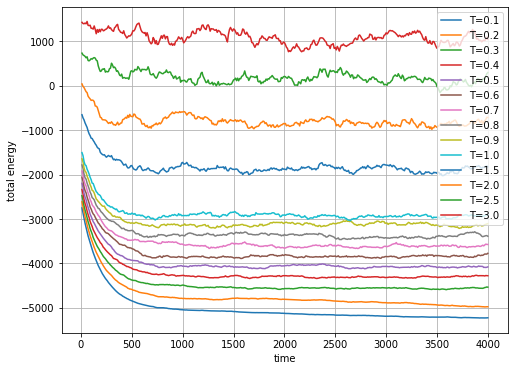

In [53]:
plt.figure(figsize=(8, 6))

for temp in Ts2:
    plt.plot(ene2[temp][:, 0], ene2[temp][:, 4], label='T=%.1f' % temp)

plt.legend()
plt.grid(axis='both')
plt.xlabel('time')
plt.ylabel('total energy')
plt.show()

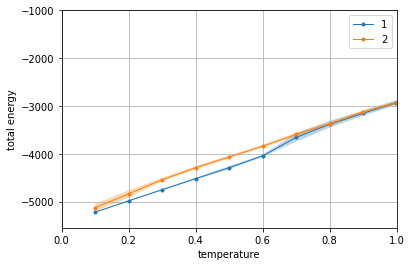

In [54]:
energy2_mean = []
energy2_var = []

for temp in Ts2:
    energy2_mean.append(np.mean(ene2[temp][50:, 4]))
    energy2_var.append(np.std(ene2[temp][50:, 4])**2)

plt.plot(Ts, energy_mean, '.-', linewidth=1, label='1')
# plt.errorbar(Ts, energy_mean, np.sqrt(energy_var))
plt.fill_between(Ts, energy_mean - np.sqrt(energy_var), energy_mean + np.sqrt(energy_var), alpha=0.3)

plt.plot(Ts2, energy2_mean, '.-', linewidth=1, label='2')
# plt.errorbar(Ts2, energy2_mean, np.sqrt(energy2_var))
plt.fill_between(Ts2, energy2_mean - np.sqrt(energy2_var), energy2_mean + np.sqrt(energy2_var), alpha=0.3)

plt.grid()
plt.xlabel('temperature')
plt.ylabel('total energy')
plt.xlim([0, 1])
plt.gca().set_ylim(top=-1000)
plt.legend()
plt.show()

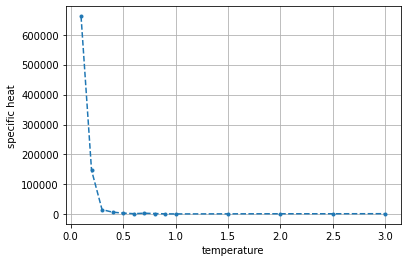

In [55]:
Cv2 = energy2_var/Ts2**2

plt.plot(Ts2, Cv2, '.--')
plt.xlabel('temperature')
plt.ylabel('specific heat')
plt.grid()
plt.show()